![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

In [5]:
tweets["text"].values

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

### Análisis descriptivo

In [6]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [7]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

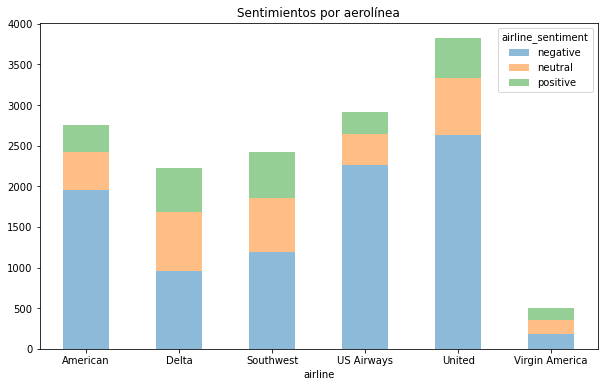

In [8]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentimientos por aerolínea")

### Librerias, Variables de interés y predicción

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score

In [10]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [11]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 1
# Objeto CountVectorizer y set de entrenamiento

vect_A= CountVectorizer()
X_train_A = vect_A.fit_transform(X_train)

In [13]:
# Ojeto CountVectorizer al set de test
X_test_A = vect_A.transform(X_test)

In [14]:
# Objeto RandomForestClassifier y set de entrenamiento
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_train_A, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [15]:
# Set de test
y_pred_A = rf1.predict(X_test_A)

In [16]:
# Evaluación de desempeño
accuracyrf1 = accuracy_score(y_test, y_pred_A)
print("Accuracy CountVectorizer:", accuracyrf1)

Accuracy CountVectorizer: 0.7711092715231788


Se realizó una implementación de un modelo de regresión de bosques aleatorios (Random Forest regresión), utilizando la función CountVectorizer para crear matrices de un conjunto de tweets y su sentimiento asociado. Se calcula la precision del modelo con la función  accuracy_score (0.7711).

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [17]:
# Celda 2
# Objeto CountVectorizer y stopwords
vect_B = CountVectorizer(stop_words='english')

In [18]:
# Set de entrenamiento
X_train_B = vect_B.fit_transform(X_train)

In [19]:
# Objeto CountVectorizer al set de test
X_test_B = vect_B.transform(X_test)

In [20]:
# Objeto RandomForestClassifier y set de entrenamiento
rf2= RandomForestClassifier(random_state=42)
rf2.fit(X_train_B, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [21]:
# Set de test
y_pred_B = rf2.predict(X_test_B)

In [22]:
# Evalución de desempeño
accuracyrf2= accuracy_score(y_test, y_pred_B)
print("Accuracy Stopwords:", accuracyrf2)

Accuracy Stopwords: 0.761796357615894


Creamos matrices usando CountVectorizer y eliminando  Stopwords, utilizamos el conjunto de datos en conjuntos de entrenamiento y prueba de la función train_test_split() de scikit-learn, almacenados en entrenamiento y pruebas en las variables x_train, x_test, y_train, y_test, respectivamente.

Se crea X_train_B con la función vec.fit_transform(X_train) y X_test_B con vect_Btransform(X_test).

Se ajusta el modelo utilizando los datos de entrenamiento con la función fit(). Se realizan predicciones en los datos de prueba utilizando el método predict() del objeto. Se calcula la precisión del modelo con la función  accuracy_score (0.7618). En este caso, el accuracy es muy parecido.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [23]:
# Celda 3
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# Objeto CountVectorizer- solo verbos
vect_C = CountVectorizer(tokenizer=lambda text: [word for word, pos in nltk.pos_tag(nltk.word_tokenize(text)) if pos.startswith('V')])

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [24]:
# Objeto WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [25]:
# Función  para  lematizar los textos
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in text.split()])

In [26]:
# Set de entrenamiento con lemitización
X_train_C = vect_C.fit_transform(X_train.apply(lemmatize_text))

In [27]:
# set de entrenamiento
X_test_C = vect_C.transform(X_test.apply(lemmatize_text))

In [28]:
# RandomForestClassifier
rf3= RandomForestClassifier(random_state=42)
rf3.fit(X_train_C, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
# set de test
y_pred_C= rf3.predict(X_test_C)

In [30]:
# Evalución de desempeño
accuracyrf3 = accuracy_score(y_test, y_pred_C)
print("Accuracy LematizaciónCV:", accuracyrf3)

Accuracy LematizaciónCV: 0.6514900662251656


Para el desarrollo del punto 3, creamos matrices usando lematización con verbos, utilizamos el conjunto de datos en conjuntos de entrenamiento y prueba de la función train_test_split() de scikit-learn, almacenados en entrenamiento y pruebas en las variables x_train, x_test, y_train, y_test, respectivamente.

Se crea X_train_C, con la función vectorizer.fit_transform y X_test_vec_C = vectorizer.transform(X_test), se ajusta el modelo utilizando los datos de entrenamiento con la función fit(). Se realizan predicciones en los datos de prueba utilizando el método predict() del objeto. 

Se calcula la precision del modelo utilizando la función accuracy_score con accuaracy (0.6515).

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [31]:
# Celda 4
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
import multiprocessing
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
tokenizer = word_tokenize
vect_D = CountVectorizer(stop_words='english', max_df=0.8, min_df=2, tokenizer=lemmatizer.lemmatize)


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
# Set de entrenamiento
X_train_D =vect_D. fit_transform(X_train)
X_test_D = vect_D.transform(X_test)

In [33]:
# Modelo RandomForestClassifier

rf4 = RandomForestClassifier(random_state=42)
rf4.fit(X_train_D, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
# Predicción sobre el set de test
y_pred_D= rf4.predict(X_test_D)

In [35]:
# Evaluación del modelo
accuracyrf4= accuracy_score(y_test, y_pred_D)
print("Accuracy Multiples:", accuracyrf4)

Accuracy Multiples: 0.6908112582781457


Se entreno un modelo de clasificación utilizando el algoritmo RandomForestClassifier de la librería sklearn. Creamos matrices usando lematización con verbos y stopwords, utilizamos el conjunto de datos en conjuntos de entrenamiento y prueba de la función train_test_split() de scikit-learn, almacenados en entrenamiento y pruebas en las variables x_train, x_test, y_train e y_test, respectivamente.

Se creo el modelo de clasificación RandomForestClassifier y se realizan predicciones en los datos de prueba utilizando el método predict()  y se calcula la precisión del modelo utilizando la función accuracy_score (0.6908).

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

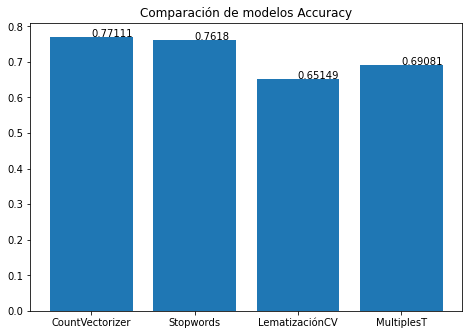

In [36]:
# Celda 5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos Accuracy")
ejeX = ['CountVectorizer', 'Stopwords', 'LematizaciónCV', 'MultiplesT']
ejeY = [round(accuracyrf1,5), round(accuracyrf2,5), round(accuracyrf3,5), round(accuracyrf4,5)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Modelo con mejor desempeño: RF CountVectorizer.

Según los resultados, este método resulta con la métrica de desempeño accuracy más alta. Lo cual indica que obtuvo una mejor clasificación de tweets en el análisis de sentimientos. La conversión del texto a una matriz de recuento de términos por parte de CountVectorizer en este caso resulta ser la más efectiva y se puede atribuir en parte a la naturaleza de los datos. Al estar analizando tweets de miles de personas, nos podemos encontrar con diversas variaciones léxicas, semanticas y abreviaciones que afectan el desempeño de los distintos métodos de procesamiento de lenguaje natural. Haciendo que la información suministrada al modelo en métodos como eliminación de stopwords y lematización con verbos se vea afectada, lo que resulta en falta o exceso de información suministrada al modelo y un desempeño más pobre.


Modelo con menor desempeño: RF LematizaciónCV.

La lematización con verbos se enfoca en llevar el texto a su forma base o de diccionario y debido al tipo de data analizado, se pueden encontrar errores de ortografía, proverbios, abreviaciones... que no se puedan lematizar facilmente, y por lo tanto afectará el desempeño del modelo entrenado. Esta es una clara desventaja de este método.

El modelo con mejor precisión es  Stopwords y se acerca ligeramente CountVectrorizer